In [ ]:
import numpy as np

# Ejercicio 1 | Operaciones matriciales
Dada una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático, se
requiere computar las normas l0, l1, l2, l-infinity,

In [ ]:
def norma_p(X,p):
  """
  Calcula la norma L0, L1, L2 y L-inf de los vectores filas de la matriz X
  p = 0 (int) para calcular la L0
  p = 1 (int) para calcular la L1
  p = 2 (int) para calcular la L2
  p = 'inf' (string) para calcular la L-inf
  """
  
  if p == 0:
    return np.sum(X!=0,axis=1)
  if p == 1:
    return np.sum(np.abs(X),axis=1)
  if p == 2:
    return np.sqrt(np.sum(np.power(X,p),axis=1))
  if p == 'inf':
    return np.max(np.abs(X),axis=1)
  else:
    return -1

In [ ]:
X = np.random.rand(20,5)
norma_p(X,'inf')

array([0.76702456, 0.56558748, 0.677301  , 0.55432851, 0.95301078,
       0.76569817, 0.52836516, 0.92100392, 0.36086628, 0.6435321 ,
       0.76960533, 0.89698458, 0.92857593, 0.62561513, 0.58393485,
       0.95960221, 0.69573848, 0.91211769, 0.83300745, 0.94221428])

# Ejercicio 2 | Sorting
Data una matriz en formato numpy array, donde cada fila de la matriz representa un vector matemático, se requiere computar la norma l2 de cada vector.
Una vez obtenida la norma l2 de cada vector, se debe ordenar las normas de mayor a menor.
Finalmente, obtener la matriz original ordenada por fila según la norma l2.
Todas las operaciones debe ser vectorizadas.

In [ ]:
X = [[1,2,3],[4,5,6],[900,8,7],[8,8,9]]
normas = norma_p(X,2)
index = np.argsort(normas)
sorted_norm = normas[index[::-1]]

print(normas)
print(sorted_norm)

[  3.74165739   8.77496439 900.06277559  14.45683229]
[0 1 3 2]
[900.06277559  14.45683229   8.77496439   3.74165739]


# Ejercicio 3 | Indexing 
Construir un índice para identificadores de usuarios.
Identificadores de usuarios = users_id = [15, 12, 14, 10, 1, 2, 1]
Índice de usuarios = users_id = [0, 1, 2, 3, 4, 5, 4]
Objetivo: construir id2idx e idx2id.
Crear una clase. El índice debe construirse en el constructor.
Armar métodos de instancia “get_users_id” y “get_users_idx”
id2idx = [-1 4 5 -1 -1 -1 -1 -1 -1 -1 3 -1 1 -1 2 0]
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
id2idx[15] -> 0 | id2idx[12] -> 1 | id2idx[3] -> -1
idx2id[0] -> 15 | idx2id[4] -> 1

In [ ]:
class Indexing():
  def __init__(self,user_id):
    unicos = set(user_id)
    self.user_id = user_id
    self.user_idx = list(range(len(user_id)))

  def get_users_idx(self, user_id):
    if user_id in self.user_id:
      return self.user_id.index(user_id)
    else:
      print("El id no existe")
      return None

  def get_users_id(self, user_idx):
    if user_idx in self.user_idx:
      return self.user_id[user_idx]
    else:
      print("El idx no existe")
      return None





In [ ]:
users_id = [15, 12, 14, 10, 1, 2, 1]
index_intance = Indexing(users_id)

print(index_intance.user_id)
print(index_intance.user_idx)

# index_intance.get_users_idx(155)
index_intance.get_users_id(8)


[15, 12, 14, 10, 1, 2, 1]
[0, 1, 2, 3, 4, 5, 6]
El idx no existe


# Ejercicio 4 | Precision, recall y accuracy

In [ ]:
import numpy as np

def confusion_vars(truth,prediction):
  TP = np.sum(np.logical_and(truth,prediction))
  TN = np.sum(np.logical_and(np.logical_not(truth),np.logical_not(prediction)))
  FP = np.sum(np.logical_and(np.logical_not(truth),prediction))
  # FN = np.sum(np.logical_and(truth,np.logical_not(prediction)))
  FN = len(truth) - TP - TN - FP

  return TP, TN, FP, FN

def Precision(truth,prediction):
  TP, _, FP, _ = confusion_vars(truth,prediction)
  return TP / (TP + FP)

def Recall(truth,prediction):
  TP, _, _, FN = confusion_vars(truth,prediction)
  return TP / (TP + FN)

def Accuracy(truth,prediction):
  TP, TN, FP, FN = confusion_vars(truth,prediction)
  return (TP + TN) / (TP + TN + FP + FN)


truth =      [1,1,0,1,1,1,0,0,0,1]
prediction = [1,1,1,1,0,0,1,1,0,0]


P = Precision(truth,prediction)
R = Recall(truth,prediction)
A = Accuracy(truth,prediction)

print('Precision: ',P)
print('Recall: ',R)
print('Accuracy: ',A)

Precision:  0.5
Recall:  0.5
Accuracy:  0.4


# Ejercicio 5 | Average query precision

In [ ]:
def reprint(a):
  return str(a)

def presicion_qid(q_id,truth_relevance):
  clases = list(set(q_id))
  q_id = np.array(q_id)
  a = np.array(clases)
  q_matrix= np.tile(q_id,(len(clases),1))
  clases_matrix = np.transpose(np.tile(clases,(len(q_id),1)))
  tr_matrix = np.tile(truth_relevance,(len(a),1))
  diff = q_matrix - clases_matrix
  class_split = np.where(diff == 0,1,0)
  class_split_sum = np.sum(class_split,axis=1)
  class_matrix_tr = np.sum(np.logical_and(tr_matrix,class_split),axis=1)
  Precision_list = class_matrix_tr/class_split_sum
  average_query_precision = np.sum(Precision_list)/len(Precision_list)

  return (clases, Precision_list, average_query_precision)


In [ ]:
q_id =            [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]
predicted_rank =  [0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]
truth_relevance = [True, False, True, False, True, True, True, False, False, False, False, False, True, False, False, True]

clases, Precision_list, average_query_precision = presicion_qid(q_id,truth_relevance)

for i in range(len(clases)):
  print('Precision Q_id {}: {}'.format(clases[i],Precision_list[i]))
print('Average query precision: {}'.format(average_query_precision))

Precision Q_id 1: 0.5
Precision Q_id 2: 1.0
Precision Q_id 3: 0.0
Precision Q_id 4: 0.5
Average query precision: 0.5


# Ejecicio 6: Distancia a Centroides

Dada una nube de puntos X y centroides C, obtener la distancia entre cada vector X y los centroides utilizando operaciones vectorizadas y broadcasting en NumPy. Utilizar como referencia los siguientes valores:

X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
C = [[1, 0, 0], [0, 1, 1]]   

In [ ]:
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] 
C = [[1, 0, 0], [0, 1, 1]]

In [ ]:
def dist(nube,centroides):
  x = np.array(nube)
  c = np.array(centroides)
  dist=[]
  for centroid in c:
    diff = x-centroid
    dist.append(np.sqrt(np.sum(diff*diff,axis = 1)))
  return dist

In [ ]:
distancias = dist(X,C)
print(distancias)

[array([ 3.60555128,  8.36660027, 13.45362405]), array([ 2.44948974,  7.54983444, 12.72792206])]


# Ejecicio 7: Etiquetar Cluster
Obtener para cada fila en X, el índice de la fila en C con distancia euclídea más pequeña. Es decir, para cada fila en X, determinar a qué cluster pertenece en C. Hint: usar np.argmin.

In [ ]:
def cluster(dist):
  return np.argmin(dist, axis=0)

cluster(distancias)

array([1, 1, 1])

# Ejercicio 8: Implementación Básica de K-means
K-means es uno de los algoritmos más básicos en Machine Learning no supervisado. Es un algoritmo de clusterización, que agrupa datos que comparten características similares. Recordemos que entendemos datos como n realizaciones del vector aleatorio X.

El algoritmo funciona de la siguiente manera:

El usuario selecciona la cantidad de clusters a crear n.
Se seleccionan n elementos aleatorios de X como posiciones iniciales del los centroides C.
Se calcula la distancia entre todos los puntos en X y todos los puntos en C.
Para cada punto en X se selecciona el centroide más cercano de C.
Se recalculan los centroides C a partir de usar las filas de X que pertenecen a cada centroide.
Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie dada una tolerancia.
Se debe por lo tanto implementar la función k_means(X, n) de manera tal que, al finalizar, devuelva la posición de los centroides y a qué cluster pertenece cada fila de X.

Hint: para (2) utilizar funciones de np.random, para (3) y (4) usar los ejercicios anteriores, para (5) es válido utilizar un for. Iterar 10 veces entre (3) y (5).


In [1]:
from matplotlib import cm
import numpy as np
from matplotlib import pyplot as plt

def dist(nube,centroides):
  x = np.array(nube)
  c = np.array(centroides)
  dist=[]
  for centroid in c:
    diff = x-centroid
    dist.append(np.sqrt(np.sum(diff*diff,axis = 1)))
  return dist

def cluster(dist):
  return np.argmin(dist, axis=0)

def k_means(X,k,loops,figure=False):
  cant_netroides = k

  cent_index_all = np.arange(0,len(X))
  np.random.shuffle(cent_index_all)
  cent_index = cent_index_all[0:cant_netroides]
  centroides = X[cent_index]

  for l in range(loops):
    index_min_dist = cluster(dist(X,centroides))
    target = np.zeros(shape=(len(X),len(centroides),2))
    target[[range(len(target))],[index_min_dist]] = X[range(len(target))]
    centroides = np.average(target,axis=0,weights=np.logical_and(target,target) )

  if figure:
    plt.figure()
    c = cm.get_cmap('viridis', 8)
    plt.scatter(X[:,0],X[:,1], marker = '.',c=c(index_min_dist/np.max(index_min_dist)))
    plt.plot(centroides[:,0],centroides[:,1],'r^')
    plt.show()




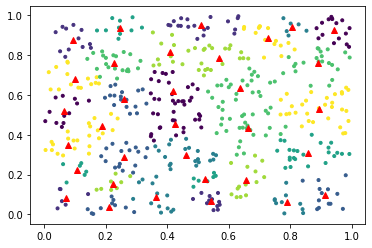

In [3]:
X = np.random.rand(500,2)
k = 33
loops = 5 
k_means(X,k,loops,figure=True)

# Ejercicio 9: Computar Métricas con __call__ 🏠
En problemas de machine learning, es muy común que para cada predicción que obtenemos en nuestro dataset de verificacion y evaluacion, almacenemos en arreglos de numpy el resultado de dicha predicción, junto con el valor verdadero y parámetros auxiliares (como el ranking de la predicción y el query id).

Luego de obtener todas las predicciones, podemos utilizar la información almacenada en los arreglos de numpy, para calcular todas las métricas que queremos medir en nuestro sistema.

Una buena práctica para implementar esto en Python, es crear clases que hereden de una clase Metric “base” y que cada métrica implemente el método __call__.

Utilizar herencia, operador __call__ y kwargs, para escribir un programa que permita calcular todas las métricas de los ejercicios anteriores mediante un for.

In [ ]:

import numpy as np


class Metric():
  def __init__(self):
    pass

  def confusion_vars(self,truth,prediction):
    TP = np.sum(np.logical_and(truth,prediction))
    TN = np.sum(np.logical_and(np.logical_not(truth),np.logical_not(prediction)))
    FP = np.sum(np.logical_and(np.logical_not(truth),prediction))
    # FN = np.sum(np.logical_and(truth,np.logical_not(prediction)))
    FN = len(truth) - TP - TN - FP
    return TP, TN, FP, FN

  def Precision(self,truth,prediction):
    TP, _, FP, _ = self.confusion_vars(truth,prediction)
    return TP / (TP + FP)

  def Recall(self,truth,prediction):
    TP, _, _, FN = self.confusion_vars(truth,prediction)
    return TP / (TP + FN)

  def Accuracy(self,truth,prediction):
    TP, TN, FP, FN = self.confusion_vars(truth,prediction)
    return (TP + TN) / (TP + TN + FP + FN)
  
  def __call__(self):
    truth = self.truth
    prediction = self.predict
    p = self.Precision(truth,prediction)
    r = self.Recall(truth,prediction)
    a = self.Accuracy(truth,prediction)
    return (p,r,a)

class Result(Metric):
  def __init__(self,truth, predict):
    self.truth = truth
    self.predict = predict
  
  def __call__(self):
    (p,r,a) = super().__call__()
    print('Precision: ',p)
    print('Recall: ',r)
    print('Accuracy: ',a)
    # return (p,r,a)

In [ ]:
truth =      [1,1,0,1,1,1,0,0,0,1]
prediction = [1,1,1,1,0,0,1,1,0,0]

truth = np.array(truth)
prediction = np.array(prediction)

r = Result(truth,prediction)
print(truth)
print(prediction)
r()

[1 1 0 1 1 1 0 0 0 1]
[1 1 1 1 0 0 1 1 0 0]
Precision:  0.5
Recall:  0.5
Accuracy:  0.4
